In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# Linear Regression

In this lab, we are going to continue to explore linear regression and introduce the concept of regularisation, specifically, Ridge Regression, Lasso and Elastic Net.

This lab starts with Part III of the previous one!



## Part 3 - Polynomial basis function

* Generate a 2D dataset using a sine wave (10 values for `x` in the interval $[0, 10]$), perturbed by a small gaussian noise. *Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0
* The Polynomial basis function that you will use is of the following form:
    - $\phi_i(x)=x^i$
* You will do this to create models of degrees 2, 4, and 9.
    - Transform your original `x` into the design matrix $\Phi$ by applying the basis functions to each element of `x`
    - For degree 2: $i\in[0,1,2]$, for degree 4: $i\in[0,1,2,3,4]$, and for degree 9: $i\in[0,1,2,...,9]$
    - *This means that for each Degree you will create a different $\Phi$ and fit a different regression model.*

* Plot the data and the prediction for each degree.
* Which degree of polynomial works better to model this scenario? 

Example: Let's say that $$x=\begin{bmatrix} x_1=2 \\ x_2=3 \\ x_3=1 \end{bmatrix}$$
Then for Degree 2 I will use the following basis functions: $\phi_0(x_j)=x_j^0, \phi_1(x_j)=x_j^1, \phi_2(x_j)=x_j^2$.

In this case, $\Phi$ will look like: 
$$\Phi=\begin{bmatrix} \phi_0(x_1)=x_1^0 & \phi_1(x_1)=x_1^1 & \phi_2(x_1)=x_1^2 \\ \phi_0(x_2)=x_2^0 & \phi_1(x_2)=x_2^1 & \phi_2(x_2)=x_2^2 \\ \phi_0(x_3)=x_3^0 & \phi_1(x_3)=x_3^1 & \phi_2(x_3)=x_3^2 \end{bmatrix}$$

Finally:
$$\Phi=\begin{bmatrix} 1 & 2 & 4 \\ 1 & 3 & 9 \\ 1 & 1 & 1 \end{bmatrix}$$

__*Important:* You have to code this exercise yourself.__



In [2]:
def linear_regression_PI(X, y):
    """
    Implements a Linear Regression model using the Moore-Penrose pseudo-inverse
    
    Parameters
    ----------
    X : array
        A 2-dimensional array with samples in the rows and features in the columns
    y : array
        An array with the same number of  as samples in X, the values to predict
    
    Returns
    -------
    w : array
        Learnt parameters
        
    Notes
    -----
    The first column of w corresponds to the bias (`w_0`)
    """
    y = y.reshape(-1,1)
    w = np.linalg.pinv(X).dot(y)
    return w

In [5]:
# your code here
np.random.seed(0)
x = np.linspace(0, 10, 10)
y = 4 * np.sin(x) + np.random.normal(0, 1, 10)



degrees = [2, 4, 9]

design_matrices = {}

for degree in degrees:

    X_degree = np.ones((len(x), degree + 1))

    for j in range(X_degree.shape[1]):

        coluna = (x**j).reshape(-1, 1)
        X_degree[:, j] = coluna.T

    design_matrices[degree] = X_degree

X_degree_2 = design_matrices[2]

X_degree_4 = design_matrices[4]

X_degree_9 = design_matrices[9]


In [6]:
w_degree_2 = linear_regression_PI(X_degree_2,y)
w_degree_4 = linear_regression_PI(X_degree_4,y)
w_degree_9 = linear_regression_PI(X_degree_9,y)

In [7]:
y_pred_degree_2 = X_degree_2@w_degree_2

y_pred_degree_4 = X_degree_4@w_degree_4

y_pred_degree_9 = X_degree_9@w_degree_9


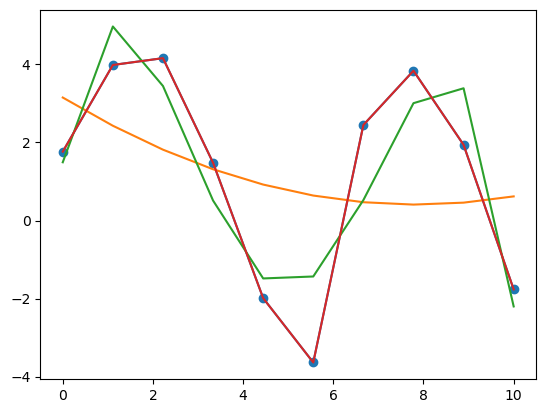

In [10]:
plt.plot(x,y)
plt.plot(x,y_pred_degree_2)
plt.plot(x,y_pred_degree_4)
plt.plot(x,y_pred_degree_9)
plt.scatter(x, y, label='Original data')
#obs o polinomio de grau 9 passa por todos os pontos
# Apesar do de grau 9, se encaixar perfeitamente aos dados de treino, ele não vai se encaixar bem para fazer previsões pois
# ele se encaixou tão bem aos dados de treino que ele não consegue generalizar para mais dados.(overfitting)

## Part 4 - Polynomial basis function

For this part you will replicate the previous part but using the existing functions from sklearn!

* Use the same data as the previous part.
* Use sklearn's Linear Regression estimator together with a Polynomial transform to make a Linear regression with a polynomial basis.

*Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0

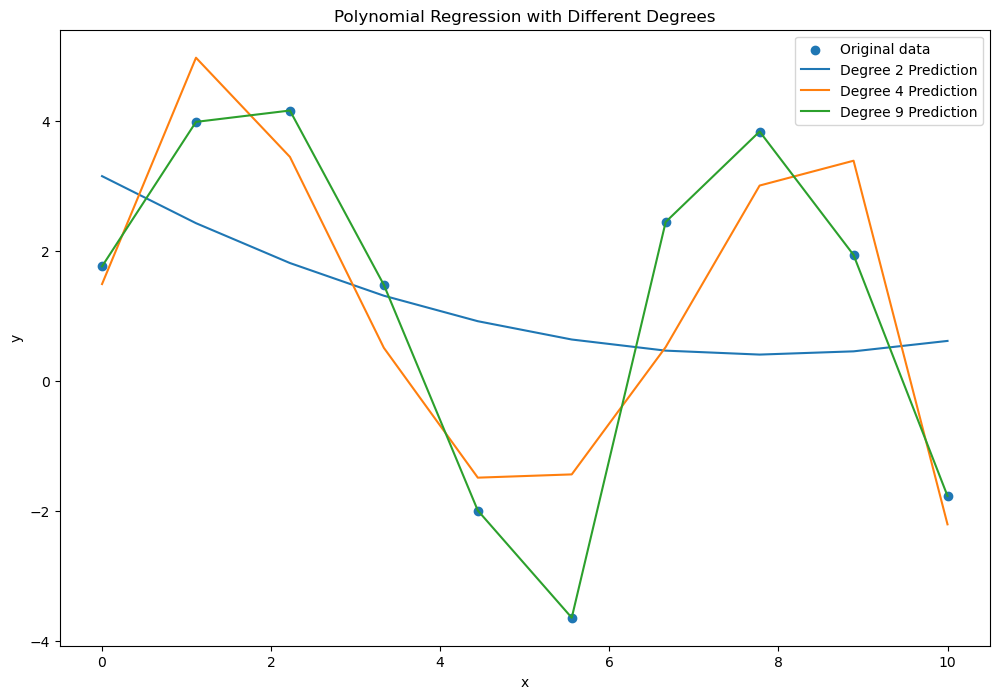

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)

x = np.linspace(0, 10, 10)
y = 4 * np.sin(x) + np.random.normal(0, 1, 10)

x = x.reshape(-1, 1)

degrees = [2, 4, 9]

models = {}
predictions = {}

for degree in degrees:

    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly_features.fit_transform(x)
  
    model = LinearRegression()
    model.fit(X_poly, y)
    
    y_pred = model.predict(X_poly)
    
    models[degree] = model
    predictions[degree] = y_pred

plt.figure(figsize=(12, 8))
plt.scatter(x, y, label='Original data')


for degree in degrees:
    plt.plot(x, predictions[degree], label=f'Degree {degree} Prediction')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression with Different Degrees')
plt.legend()
plt.show()

### Load the housing dataset

Using pandas, load the following dataset (available in eclass, taken from http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html):

**housing.csv:** this dataset is constituted by 506 points in 14 dimensions. Each point represents a house in the Boston area, and the 14 attributes that you find orderly in each column are the following:
* `CRIM` - per capita crime rate by town
* `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS` - proportion of non-retail business acres per town.
* `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise) 
* `NOX` - nitric oxides concentration (parts per 10 million)
* `RM` - average number of rooms per dwelling
* `AGE` - proportion of owner-occupied units built prior to 1940
* `DIS` - weighted distances to five Boston employment centres
* `RAD` - index of accessibility to radial highways
* `TAX` - full-value property-tax rate per \$10,000
* `PTRATIO` - pupil-teacher ratio by town
* `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* `LSTAT` - % lower status of the population
* `MEDV` - Median value of owner-occupied homes in $1000's

This dataset is normally associated with 2 regression tasks: predicting `NOX` (in which the nitrous oxide level is to be predicted); and predicting price `MEDV` (in which the median value of a home is to be predicted).

This dataset was also pre-processed and scaled.

In [41]:
housing_df = pd.read_csv('housing.csv')
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.165514,0.067815,0.0,0.273696,0.455845,0.495675,0.238389,0.000000,0.188979,0.252496,0.693147,0.085884,3.218876
1,0.000236,0.000000,0.242302,0.0,0.159428,0.436962,0.578128,0.299335,0.042560,0.099811,0.440312,0.693147,0.186040,3.117950
2,0.000236,0.000000,0.242302,0.0,0.159428,0.527320,0.469617,0.299335,0.042560,0.099811,0.440312,0.688003,0.061533,3.575151
3,0.000293,0.000000,0.063050,0.0,0.139941,0.505947,0.365901,0.370559,0.083382,0.064658,0.500130,0.690281,0.032843,3.538057
4,0.000705,0.000000,0.063050,0.0,0.139941,0.523014,0.424170,0.370559,0.083382,0.064658,0.500130,0.693147,0.094708,3.616309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.000000,0.420455,0.0,0.327021,0.458029,0.519848,0.115711,0.000000,0.151967,0.638489,0.686938,0.198109,3.152736
502,0.000438,0.000000,0.420455,0.0,0.327021,0.398993,0.565337,0.100111,0.000000,0.151967,0.638489,0.693147,0.184664,3.072693
503,0.000612,0.000000,0.420455,0.0,0.327021,0.503402,0.645695,0.090189,0.000000,0.151967,0.638489,0.693147,0.102459,3.214868
504,0.001160,0.000000,0.420455,0.0,0.327021,0.482097,0.636473,0.108419,0.000000,0.151967,0.638489,0.688788,0.123165,3.135494


In [42]:
housing_data = housing_df.values
X = housing_data[:, :-1] 
y = housing_data[:, -1]

### Let's split the data into training, validation and testing. 80% training, 10% validation and 10% testing.

In [43]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)




In [46]:
y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# Part I - Ridge Regression

Now you will write code that implements Ridge Regression using the closed form from the slides.

In [47]:
def ridge_regression(X,y,p):
    XT_T = X.T@X
    I = np.eye(len(XT_T))
    w = np.linalg.inv(p*I+XT_T)@X.T@y
    return w
    
    
    

Test different values of $\lambda$ on the validation set and choose the one that gives the best RMSE.

In [52]:
from sklearn.metrics import mean_squared_error
vec_p = np.linspace(0, 2, 20)
rmses_train = []
rmses_val = []

for i in range(len(vec_p)):
    lambda_value = vec_p[i]
    
    w_tmp = ridge_regression(X_train, y_train, lambda_value)
    y_pred_train = X_train @ w_tmp
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmses_train.append(rmse_train)

    y_pred_val = X_val @ w_tmp
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
    rmses_val.append(rmse_val)

Plot the RMSE of the validation and training sets at different values of $\lambda$. 

Try: 20 points in the interval $\lambda \in [0,2]$

Your plot should like the one below.

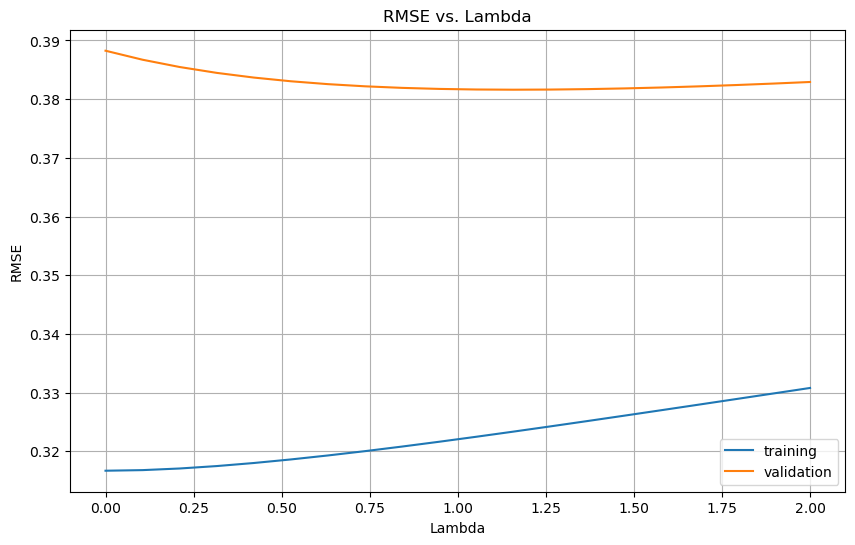

In [53]:
# your code goes here:
plt.figure(figsize=(10, 6))
plt.plot(vec_p, rmses_train, label='training')
plt.plot(vec_p, rmses_val, label='validation')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('RMSE vs. Lambda')
plt.legend()
plt.grid(True)
plt.show()


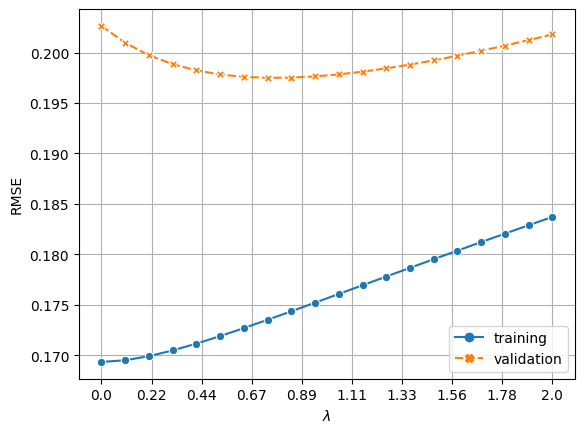

In [104]:
## leave this cell untouched to see how the plot should look like

Now, after selecting the best $\lambda$ based on the plot above, report the RMSE of the testing set.

Don't forget to use the whole training set (train+validation) to train a model with the best value of $\lambda$.

In [67]:
# your code goes here:
idx = np.array(rmses_val).argmin()
better_lambda = vec_p[idx]
X_train_n_val = np.vstack((X_train,X_val))
y_train_n_val = np.vstack((y_train,y_val))
w_better = ridge_regression(X_train_n_val,y_train_n_val,better_lambda)
y_pred = X_test @ w_better
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

0.3724974056005254


# Part II - Lasso

Now you will implement Lasso regression, but using the scikit-learn implementation to learn the weights.

You will still use the same training/validation/testing folds as in Part I

The l1 term is controlled by the alpha parameter in the scikit-learn implementation of Lasso.

In [71]:
# The general way of using the Lasso implementation (or any other classifier/regressor) of scikit-learn is as follows:
# Make sure to replace X, y, and X_val with your training set variables!
alpha_value = 
lasso_regression = Lasso(alpha=alpha_value).fit(X_train, y_train)
y_predict_lasso_reg = lasso_regression.predict(X_val)

### The goal here is to again find a good value of alpha for the RMSE in the validation set. 
Experiment with some different values, generate the same plot as Part I, and report the RMSE of testing set after selecting the best alpha from the validation set.

In [74]:
alphas = np.linspace(0.01, 2, 100)
rmses_train = []
rmses_val = []

for alpha_value in alphas:
    lasso_regression = Lasso(alpha=alpha_value).fit(X_train, y_train)
    
    y_pred_train = lasso_regression.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmses_train.append(rmse_train)
    
    y_pred_val = lasso_regression.predict(X_val)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
    rmses_val.append(rmse_val)

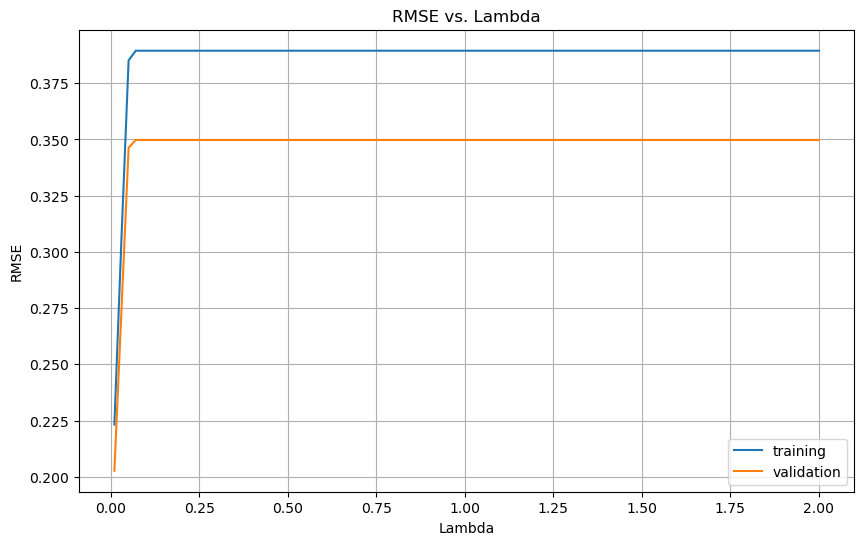

In [75]:
# your code goes here:
plt.figure(figsize=(10, 6))
plt.plot(alphas, rmses_train, label='training')
plt.plot(alphas, rmses_val, label='validation')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('RMSE vs. Lambda')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
idx = np.array(rmses_val).argmin()
alpha = alphas[idx]
X_train_n_val = np.vstack((X_train,X_val))
y_train_n_val = np.vstack((y_train,y_val))
lasso_regression = Lasso(alpha=alpha_value).fit(X_train_n_val, y_train_n_val)
y_predict_lasso_reg = lasso_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_predict_lasso_reg))
print(rmse)

0.39972125745714654


# Part III Elastic Net

Now let's combine both ridge and lasso and implement Elastic Net Regression, again we'll use the sklearn implementation.

Following the guidelines from Part II, implement Elastic Net using the sklearn implementation ElasticNet()

I strongly advise you to read the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

For simplicity here, let's apply the best $\lambda$ of Part I and the best alpha from Part II and train an Elastic Net model and report the testing set RMSE.

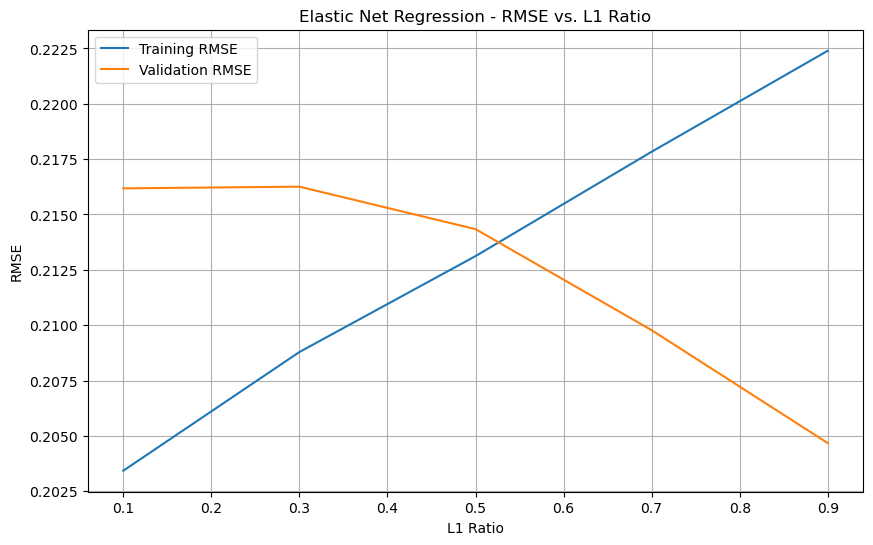

Best L1 Ratio: 0.9
RMSE on Testing Set with Best L1 Ratio: 0.21209623209576547


In [81]:
alpha_value = alpha


l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]  
rmses_train = []
rmses_val = []

for l1_ratio in l1_ratios:
    elastic_net = ElasticNet(alpha=alpha_value, l1_ratio=l1_ratio, random_state=42)
    elastic_net.fit(X_train, y_train)
    
    y_pred_train = elastic_net.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmses_train.append(rmse_train)
    
    y_pred_val = elastic_net.predict(X_val)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
    rmses_val.append(rmse_val)

plt.figure(figsize=(10, 6))
plt.plot(l1_ratios, rmses_train, label='Training RMSE')
plt.plot(l1_ratios, rmses_val, label='Validation RMSE')
plt.xlabel('L1 Ratio')
plt.ylabel('RMSE')
plt.title('Elastic Net Regression - RMSE vs. L1 Ratio')
plt.legend()
plt.grid(True)
plt.show()

best_l1_ratio = l1_ratios[np.argmin(rmses_val)]
print("Best L1 Ratio:", best_l1_ratio)


elastic_net_best = ElasticNet(alpha=alpha_value, l1_ratio=best_l1_ratio, random_state=42)
elastic_net_best.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)))

y_pred_test = elastic_net_best.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE on Testing Set with Best L1 Ratio:", rmse_test)